In [811]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from datetime import datetime 
import yfinance as yf 
from datetime import datetime
from scipy.stats import norm

sns.set_style('dark')
sns.color_palette("viridis", as_cmap = True)
company_colours = {
    'AAPL': '#d7372f',
    'AMZN': '#ecaa01',
    'GOOG': '#4bb0ac',
    'MSFT': '#00a100',
}

end_date = datetime.now()
start_date = datetime(end_date.year - 1,end_date.month, end_date.day)

stocks = ['AAPL','AMZN','GOOG','MSFT']

for stock in tech_list:
    globals()[stock]  =  yf.download(stock, start = start_date, end = end_date)

display(AAPL.head(2))
display(AMZN.head(2))
display(GOOG.head(2))
display(MSFT.head(2))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-24,140.309998,143.160004,140.300003,142.529999,141.737747,66435100
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.071487,65799300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-24,96.930000,98.089996,96.000000,96.32,96.32,66929500
2023-01-25,92.559998,97.239998,91.519997,97.18,97.18,94261600


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-24,99.550003,101.089996,98.699997,99.209999,99.209999,27391400
2023-01-25,97.199997,97.720001,95.262001,96.730003,96.730003,31000900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-24,242.500000,243.949997,240.440002,242.039993,239.912704,40234400
2023-01-25,234.479996,243.300003,230.899994,240.610001,238.495285,66526600


https://ypfsresourcelibrary.blob.core.windows.net/fcic/YPFS/Risk%20Metrics%20-%20VaR%20Statistics.pdf

https://nbviewer.org/github/anwarcsebd/stock-market-analysis/blob/master/stock-market-analysis.ipynb

Closing prices

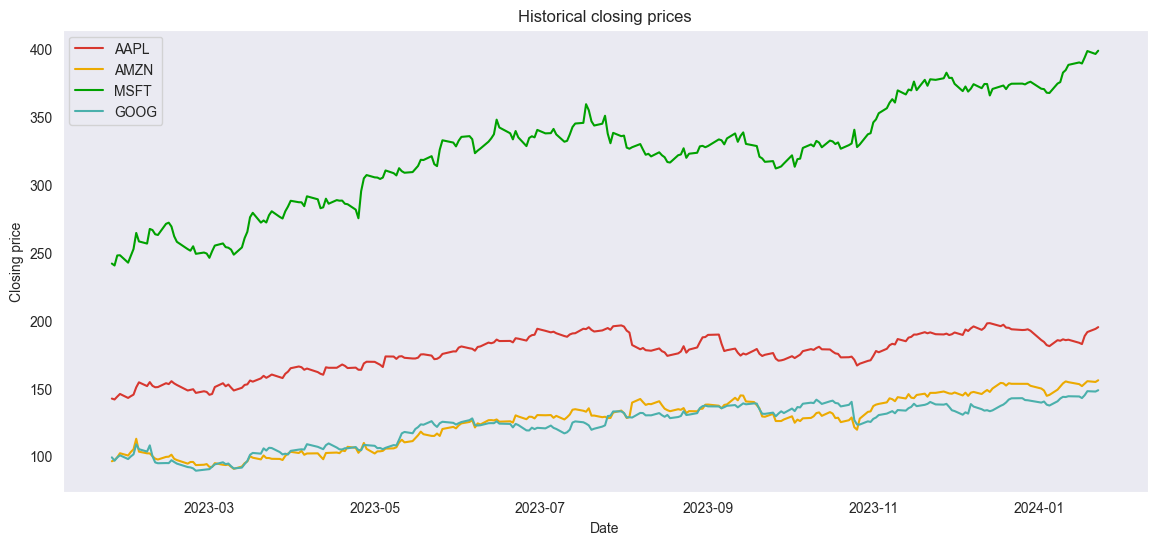

In [812]:
plt.figure(figsize = (14, 6));

sns.lineplot(data = AAPL['Close'], color = company_colours['AAPL'], label = 'AAPL', linewidth = 1.5)
sns.lineplot(data = AMZN['Close'], color = company_colours['AMZN'], label = 'AMZN', linewidth = 1.5)
sns.lineplot(data = MSFT['Close'], color = company_colours['MSFT'], label = 'MSFT', linewidth = 1.5)
sns.lineplot(data = GOOG['Close'], color = company_colours['GOOG'], label = 'GOOG', linewidth = 1.5)

plt.title('Historical closing prices')
plt.xlabel('Date')
plt.ylabel('Closing price');

Trading volume

Average trading volume (trailing 12 months) for APPLE: 58258127.015936255.
Average trading volume (trailing 12 months) for AMAZON: 56982392.14342629.
Average trading volume (trailing 12 months) for GOOGLE: 25099637.709163345.
Average trading volume (trailing 12 months) for MICROSOFT: 27204456.553784862.


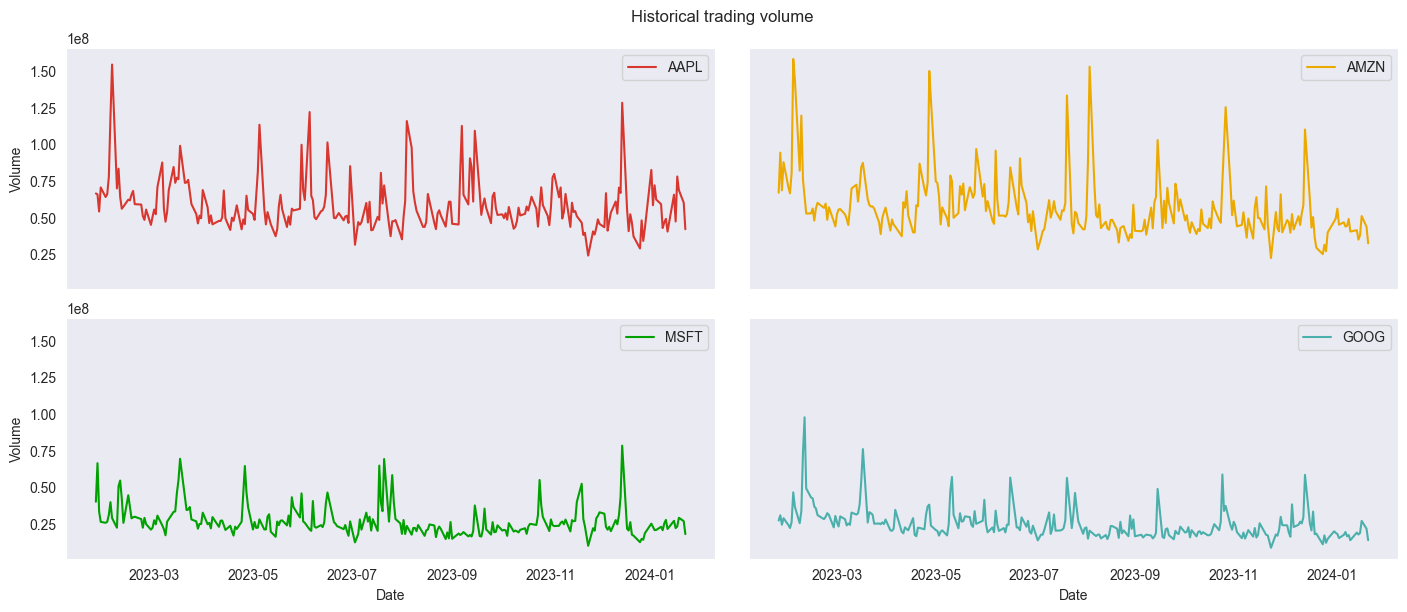

In [813]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 6), sharey=True, sharex = True)
plt.suptitle('Historical trading volume')
plt.tight_layout()

plt.subplot(2, 2, 1)
sns.lineplot(data = AAPL['Volume'], color = company_colours['AAPL'], label = 'AAPL', linewidth = 1.5)

plt.subplot(2, 2, 2)
sns.lineplot(data = AMZN['Volume'], color = company_colours['AMZN'], label = 'AMZN', linewidth = 1.5)

plt.subplot(2, 2, 3)
sns.lineplot(data = MSFT['Volume'], color = company_colours['MSFT'], label = 'MSFT', linewidth = 1.5)

plt.subplot(2, 2, 4)
sns.lineplot(data = GOOG['Volume'], color = company_colours['GOOG'], label = 'GOOG', linewidth = 1.5)

print(f'Average trading volume (trailing 12 months) for APPLE: {AAPL['Volume'].mean()}.')
print(f'Average trading volume (trailing 12 months) for AMAZON: {AMZN['Volume'].mean()}.')
print(f'Average trading volume (trailing 12 months) for GOOGLE: {GOOG['Volume'].mean()}.')
print(f'Average trading volume (trailing 12 months) for MICROSOFT: {MSFT['Volume'].mean()}.')

'Moving Average - MA'

A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

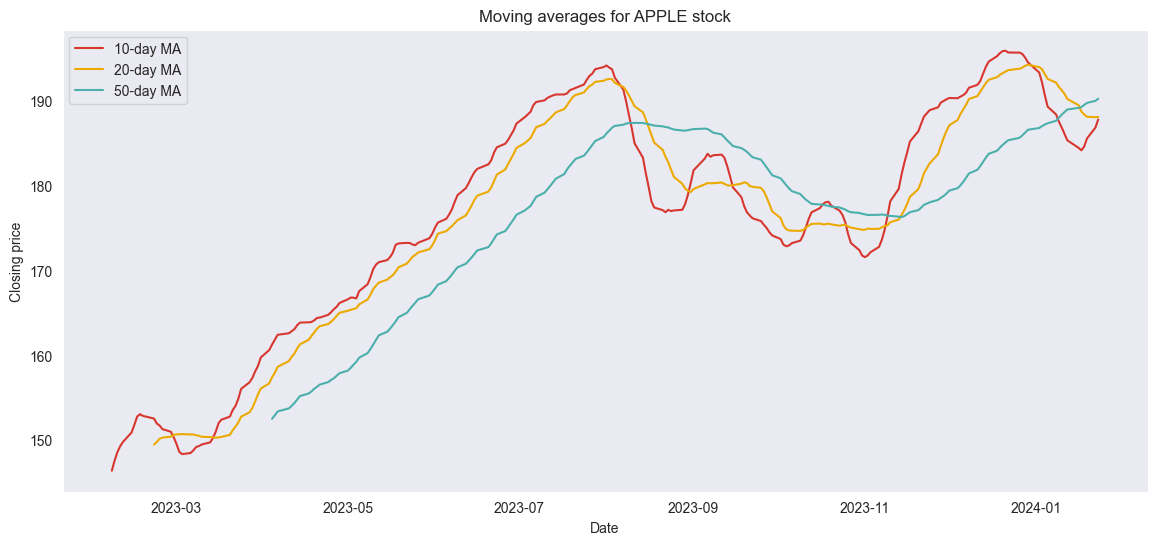

In [740]:
AAPL['MA 10 days'] = AAPL['Close'].rolling(window = 10).mean()
AAPL['MA 20 days'] = AAPL['Close'].rolling(window = 20).mean()
AAPL['MA 50 days'] = AAPL['Close'].rolling(window = 50).mean()

plt.figure(figsize = (14, 6))

sns.lineplot(data = AAPL['MA 10 days'], color = '#d7372f', label = '10-day MA', linewidth = 1.5)
sns.lineplot(data = AAPL['MA 20 days'], color = '#ecaa01', label = '20-day MA', linewidth = 1.5)
sns.lineplot(data = AAPL['MA 50 days'], color = '#4bb0ac', label = '50-day MA', linewidth = 1.5)

plt.title('Moving averages for APPLE stock')
plt.xlabel('Date')
plt.ylabel('Closing price');

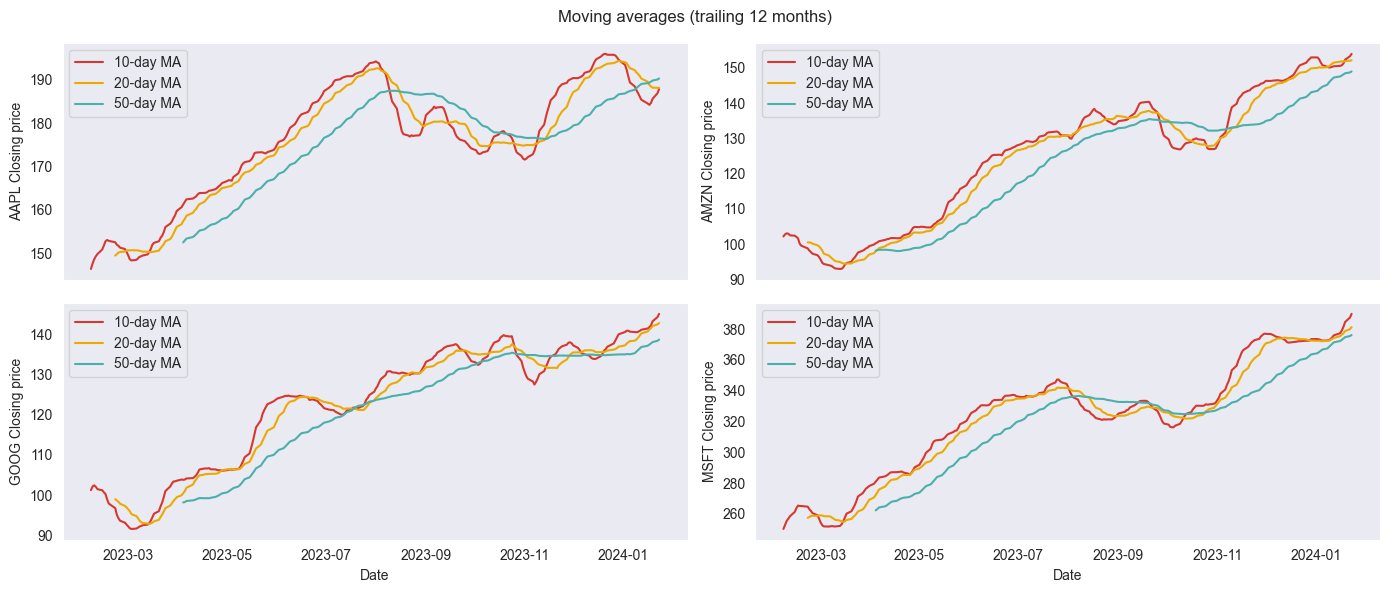

In [741]:
AAPL['MA 10 days'] = AAPL['Close'].rolling(window = 10).mean()
AAPL['MA 20 days'] = AAPL['Close'].rolling(window = 20).mean()
AAPL['MA 50 days'] = AAPL['Close'].rolling(window = 50).mean()
AMZN['MA 10 days'] = AMZN['Close'].rolling(window = 10).mean()
AMZN['MA 20 days'] = AMZN['Close'].rolling(window = 20).mean()
AMZN['MA 50 days'] = AMZN['Close'].rolling(window = 50).mean()
GOOG['MA 10 days'] = GOOG['Close'].rolling(window = 10).mean()
GOOG['MA 20 days'] = GOOG['Close'].rolling(window = 20).mean()
GOOG['MA 50 days'] = GOOG['Close'].rolling(window = 50).mean()
MSFT['MA 10 days'] = MSFT['Close'].rolling(window = 10).mean()
MSFT['MA 20 days'] = MSFT['Close'].rolling(window = 20).mean()
MSFT['MA 50 days'] = MSFT['Close'].rolling(window = 50).mean()

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 6), sharex = True)
plt.suptitle('Moving averages (trailing 12 months)')
plt.xlabel('Date')

plt.subplot(2, 2, 1)
sns.lineplot(data = AAPL['MA 10 days'], color = '#d7372f', label = '10-day MA', linewidth = 1.5)
sns.lineplot(data = AAPL['MA 20 days'], color = '#ecaa01', label = '20-day MA', linewidth = 1.5)
sns.lineplot(data = AAPL['MA 50 days'], color = '#4bb0ac', label = '50-day MA', linewidth = 1.5)
plt.ylabel('AAPL Closing price')

plt.subplot(2, 2, 2)
sns.lineplot(data = AMZN['MA 10 days'], color = '#d7372f', label = '10-day MA', linewidth = 1.5)
sns.lineplot(data = AMZN['MA 20 days'], color = '#ecaa01', label = '20-day MA', linewidth = 1.5)
sns.lineplot(data = AMZN['MA 50 days'], color = '#4bb0ac', label = '50-day MA', linewidth = 1.5)
plt.ylabel('AMZN Closing price')

plt.subplot(2, 2, 3)
sns.lineplot(data = GOOG['MA 10 days'], color = '#d7372f', label = '10-day MA', linewidth = 1.5)
sns.lineplot(data = GOOG['MA 20 days'], color = '#ecaa01', label = '20-day MA', linewidth = 1.5)
sns.lineplot(data = GOOG['MA 50 days'], color = '#4bb0ac', label = '50-day MA', linewidth = 1.5)
plt.ylabel('GOOG Closing price')

plt.subplot(2, 2, 4)
sns.lineplot(data = MSFT['MA 10 days'], color = '#d7372f', label = '10-day MA', linewidth = 1.5)
sns.lineplot(data = MSFT['MA 20 days'], color = '#ecaa01', label = '20-day MA', linewidth = 1.5)
sns.lineplot(data = MSFT['MA 50 days'], color = '#4bb0ac', label = '50-day MA', linewidth = 1.5)
plt.ylabel('MSFT Closing price')

plt.tight_layout()

Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

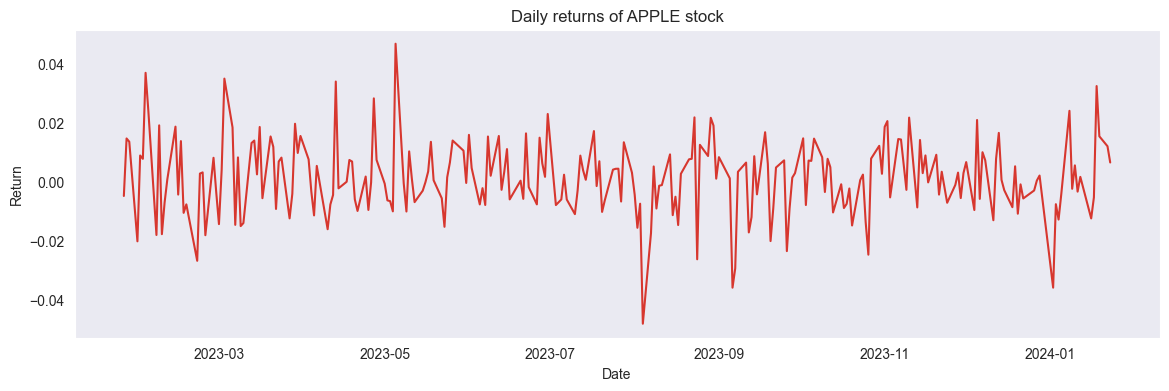

In [814]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()

plt.figure(figsize = (14, 4));
sns.lineplot(
    data = AAPL['Daily Return'],
    color = company_colours['AAPL'])
plt.title('Daily returns of APPLE stock')
plt.xlabel('Date')
plt.ylabel('Return');

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

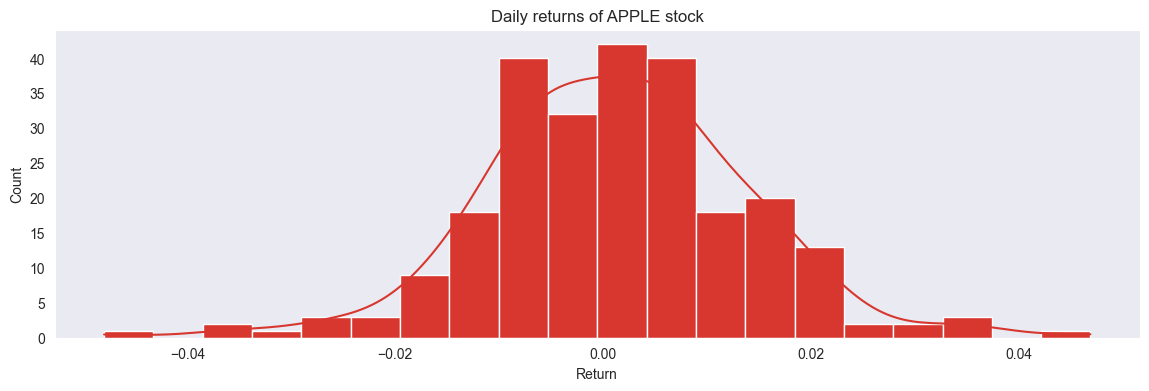

In [815]:
plt.figure(figsize = (14, 4));

sns.histplot(
    data = AAPL['Daily Return'],
    alpha = 1,
    color = company_colours['AAPL'],
    kde = True)

plt.title('Daily returns of APPLE stock')
plt.xlabel('Return');

In [744]:
all_close = pd.concat([AAPL['Close'], AMZN['Close'], GOOG['Close'], MSFT['Close']], axis = 1)
all_close.columns = ['AAPL', 'AMZN', 'GOOG', 'MSFT']
all_close

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-24,142.529999,96.320000,99.209999,242.039993
2023-01-25,141.860001,97.180000,96.730003,240.610001
2023-01-26,143.960007,99.220001,99.160004,248.000000
2023-01-27,145.929993,102.239998,100.709999,248.160004
2023-01-30,143.000000,100.550003,97.949997,242.710007
...,...,...,...,...
2024-01-17,182.679993,151.710007,142.889999,389.470001
2024-01-18,188.630005,153.500000,144.990005,393.869995
2024-01-19,191.559998,155.339996,147.970001,398.670013


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks.

Now we can compare the daily percentage return of two stocks to check how correlated.

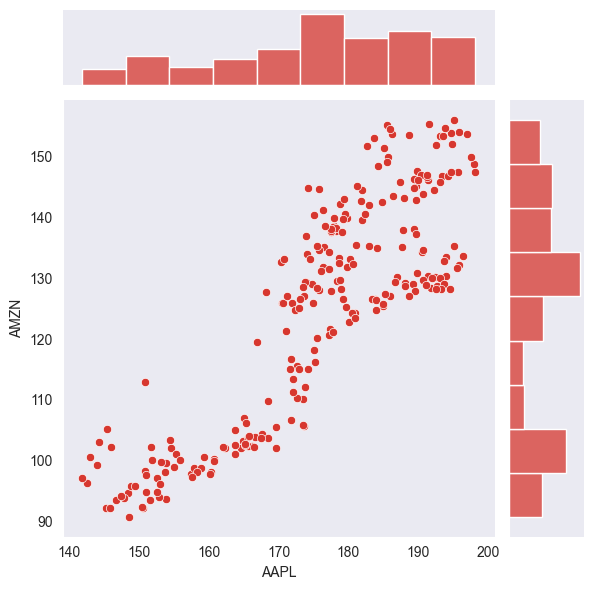

In [745]:
sns.jointplot(
    data = all_close,
    x = 'AAPL',
    y = 'AMZN',
    alpha = 1,
    color = '#d7372f');

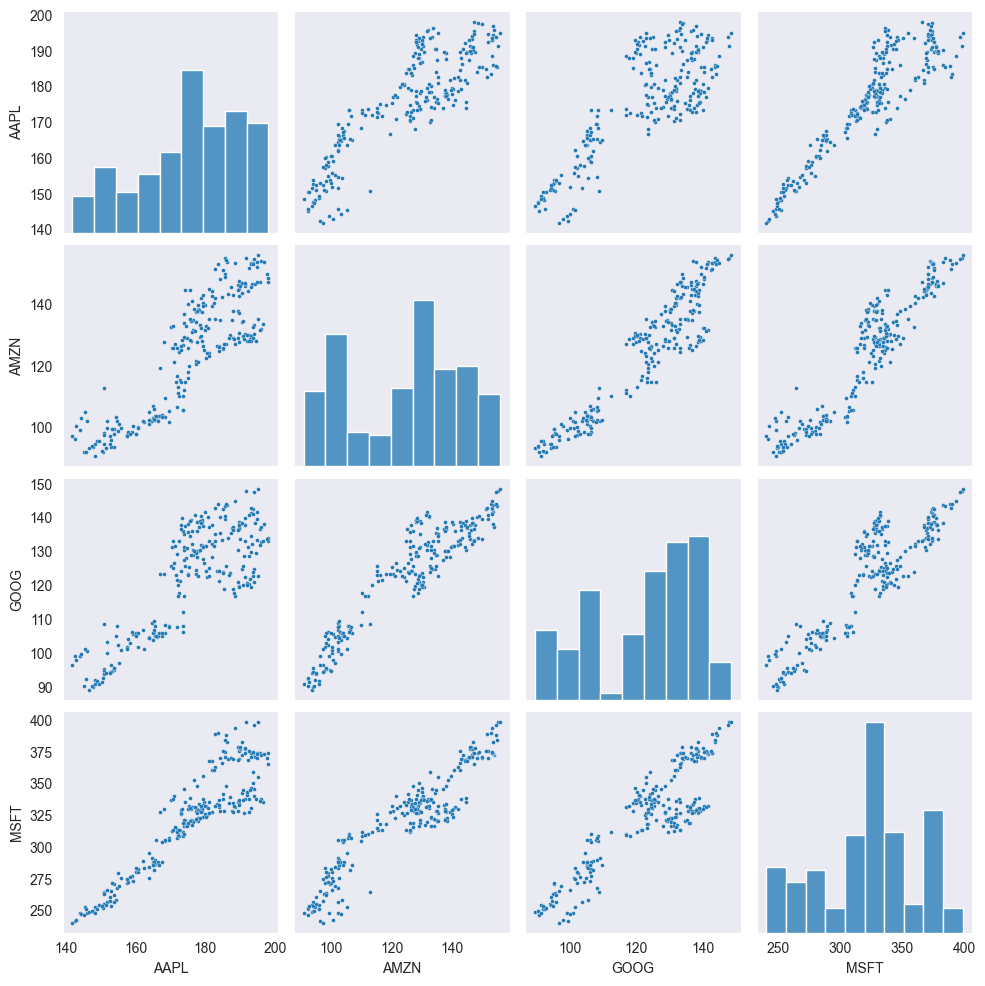

In [746]:
sns.pairplot(
    data = all_close,
    plot_kws = {'s': 8});

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

<Axes: >

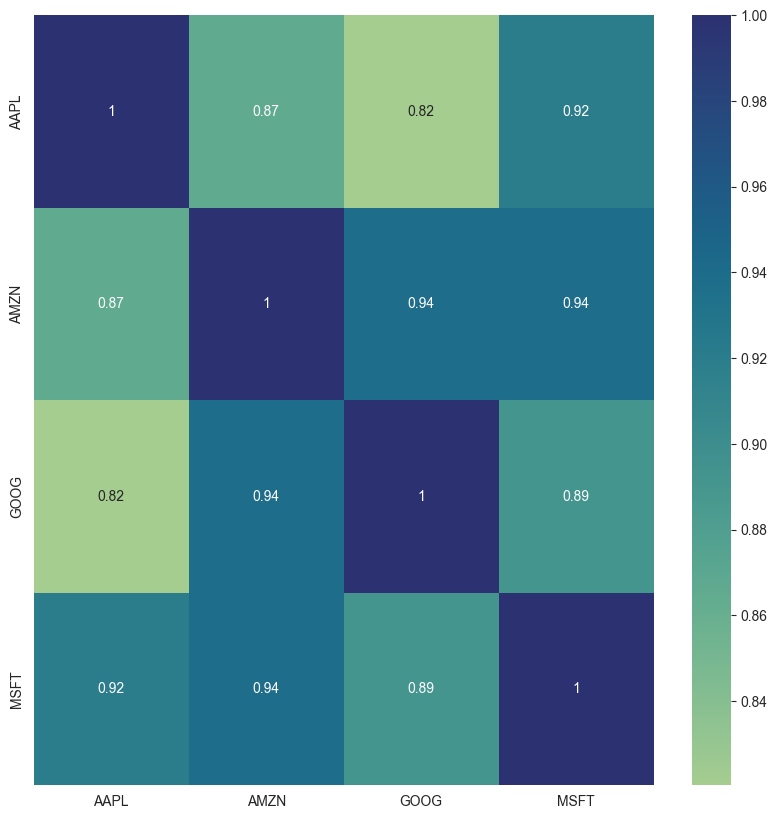

In [747]:
# Compute the correlation matrix
corr = all_close.corr()
sns.heatmap(corr, annot = True, cmap = 'crest')

We've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

Value at Risk - historical method

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns.

In [748]:
all_returns = all_close.copy()

for column in ['AAPL', 'AMZN', 'GOOG', 'MSFT']:
    all_returns[column] = all_returns[column].pct_change()

all_returns

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-24,NaN,NaN,NaN,NaN
2023-01-25,-0.004701,0.008929,-0.024997,-0.005908
2023-01-26,0.014803,0.020992,0.025121,0.030714
2023-01-27,0.013684,0.030437,0.015631,0.000645
2023-01-30,-0.020078,-0.016530,-0.027405,-0.021962
...,...,...,...,...
2024-01-17,-0.005174,-0.009467,-0.008259,-0.002050
2024-01-18,0.032571,0.011799,0.014697,0.011297
2024-01-19,0.015533,0.011987,0.020553,0.012187


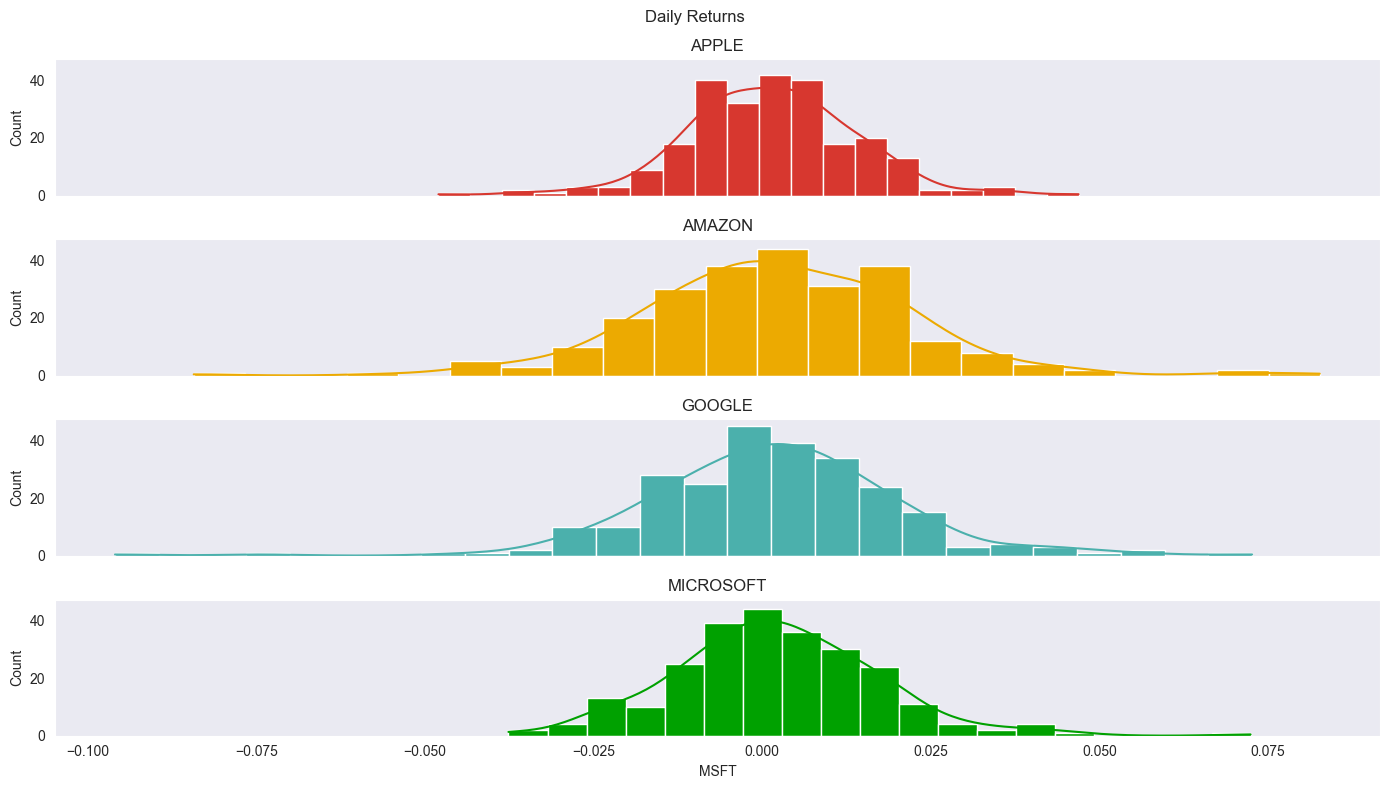

In [816]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (14, 8), sharex = True, sharey = True)
plt.suptitle('Daily Returns')

sns.histplot(data = all_returns['AAPL'], alpha = 1, color = company_colours['AAPL'], kde = True, ax = ax[0])
ax[0].set_title('APPLE')

sns.histplot(data = all_returns['AMZN'], alpha = 1, color = company_colours['AMZN'], kde = True, ax = ax[1])
ax[1].set_title('AMAZON')

sns.histplot(data = all_returns['GOOG'], alpha = 1, color = company_colours['GOOG'], kde = True, ax = ax[2])
ax[2].set_title('GOOGLE')

sns.histplot(data = all_returns['MSFT'], alpha = 1, color = company_colours['MSFT'], kde = True, ax = ax[3])
ax[3].set_title('MICROSOFT')

plt.tight_layout()

In [750]:
all_returns.sort_values(by = 'AAPL')

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-08-04,-0.048020,0.082693,-0.001786,0.003429
2023-09-06,-0.035793,-0.013914,-0.009802,-0.002009
2024-01-02,-0.035787,-0.013229,-0.009721,-0.013749
2023-09-07,-0.029249,0.018395,0.006131,-0.008922
2023-02-21,-0.026680,-0.026955,-0.026853,-0.020887
...,...,...,...,...
2023-04-13,0.034104,0.046714,0.028227,0.022399
2023-03-03,0.035090,0.030066,0.018525,0.016646
2023-02-02,0.037063,0.073799,0.072661,0.046884


Stock:            AMZN
VaR method:       Historical
Current price:    $156.02
Loss will not exceed:
   *   $3.19 per share (90% confidence)
   *   $4.28 per share (95% confidence)
   *   $6.87 per share (99% confidence)


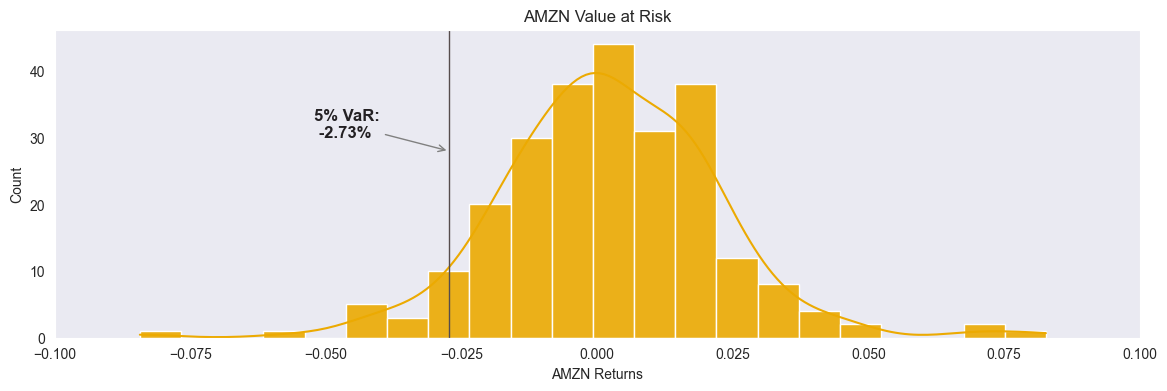

In [835]:
def VaR_historical(company):
    """
    Computes Value at Risk for a company's returns at 3 conventional confidence levels & produce a histogram.
    """
    alpha = [0.1, 0.05, 0.01]
    current_price = all_close[company].sort_index(ascending = False).iloc[0]
    var_historical = []
    print(f'Stock:            {company}')
    print('VaR method:       Historical')
    print(f'Current price:    ${current_price:.2f}')
    print(f'Loss will not exceed:')
    for i in alpha:
        loss = all_returns[company].quantile(i)
        nearest_higher = all_returns.loc[all_returns[company] < loss, company].sort_values(ascending = False).iloc[0]
        print(f'   *   ${-nearest_higher*current_price:.2f} per share ({(1-i)*100:.0f}% confidence)')
        var_historical.append({
            'Confidence': f'{i*100:.0f}%',
            'Loss%': loss,
            'Nearest higher': nearest_higher
        })
    perc_5 = var_historical[1]['Loss%']   
    plt.figure(figsize = (14, 4))
    sns.histplot(data = all_returns[company], color = company_colours[company], alpha = 0.9, kde = True)
    plt.axvline(x = perc_5, color = '#564c4d', linewidth = 1)
    plt.annotate(f'5% VaR:\n {perc_5*100:.2f}%', xy = (perc_5, 28), weight = 'bold', color = '#232023',
        xytext = (perc_5-0.025, 30), fontsize = 12, arrowprops = dict(arrowstyle = "->", color = '#808080'))
    plt.xlim(left = -0.1, right = 0.1)
    plt.xlabel(f'{company} Returns')
    plt.title(f'{company} Value at Risk')

VaR_historical('AMZN')

Value at Risk histroical method

The main drawback of the parametric approach is that real world returns usually have a distribution with “fat tails” (high kurtosis).

https://medium.com/analytics-vidhya/value-at-risk-with-python-4e3409e1c23d

The Normal Distribution is not necessarily the best way to describe returns. However, it is a very good way to picture the concepts, and it is a good starting point for us to elaborate on more complex and realistic scenarios.

The main drawback of the parametric approach is that real world returns usually have a distribution with “fat tails” (high kurtosis).

The Parametric Model estimates VaR directly from the Standard Deviation of portfolio returns. It assumes that risk factor returns are normal (so risk factor levels are lognormal) and that portfolio returns are linear functions of the risk factors, and hence normal as well. The last assumption makes it easy to derive the formula for the portfolio distribution from the security distribution, without having to generate any distributions explicitly

The Parametric method is accurate for linear assets, but less accurate for options and other non­linear derivatives. It also becomes less accurate at longer horizons. Parametric calculations are faster than either simulation method and don't need extensive historical data (only the correlation and volatility matrices are needed). The method is not recommended for long horizons, for portfolios with many options, or for assets with skewed distributions.

Variance-Covariance approach. The Variance-covariance is a parametric method which assumes that the returns are normally distributed.

In [850]:
def VaR_parametric(company): 
    """
    Computes Value at Risk for a company's returns at 3 conventional confidence levels & produce a histogram.
    """
    alpha = [0.1, 0.05, 0.01]
    current_price = all_close[company].sort_index(ascending=False).iloc[0]
    var_parametric = []  
    print(f'Stock:            {company}')
    print('VaR method:       Parametric') 
    print(f'Current price:    ${current_price:.2f}')
    print(f'Loss will not exceed:')
    for i in alpha:
        mean = np.mean(all_returns[company])
        stdev = np.std(all_returns[company], axis=0)
        z_score = norm.ppf(1 - i)
        var = -z_score * stdev
        print(f'   *   ${-var*current_price:.2f} per share ({(1-i)*100:.0f}% confidence)')
        var_parametric.append({
            'Confidence': f'{(1 - i) * 100:.0f}%',
            'Loss%': var
        })

VaR_parametric('AAPL')

Stock:            AAPL
VaR method:       Parametric
Current price:    $195.18
Loss will not exceed:
   *   $3.17 per share (90% confidence)
   *   $4.06 per share (95% confidence)
   *   $5.75 per share (99% confidence)


monte carlo

Monte Carlo Simulation is similar to Historical Simulation in that it estimates VaR by simulating risk factor scenarios and revaluing all positions in a portfolio for each trial (i.e., full re­pricing). However, instead of generating risk factor scenarios from the historical distribution, it generates them from a lognormal distribution. Thus, the distribution assumption for risk factors is the same as in the parametric model, but the method for generating the price distribution of the security is different. The method accounts for all non­linearities in portfolio positions. As in the parametric method, volatilities and correlations for the risk factors are calculated directly from time series data over user­specified start and end dates. Users may also specify an optional decay factor, as well as the number of simulations to perform per analysis. This method accurately prices all types of complex non­linear positions as well as simple linear instruments. It also provides a full distribution of potential portfolio gains and losses (which need not be symmetrical), but does not take into account any non­normality in the underlying factors (e.g. fat­tails, mean­reversion, although Monte Carlo Simulation quantifies fat­tailed risk only if scenarios are generated from appropriate conditions).

## SIMPLE METHOD

https://github.com/playgrdstar/monte_carlo_sim_VAR/blob/master/Simulating%20VAR.ipynb

In [862]:
n_sims = 1000000

current_price = all_close['AAPL'].sort_index(ascending=False).iloc[0]
mean = np.mean(all_returns['AAPL'])
stdev = np.std(all_returns['AAPL'], axis=0)


sim_returns = np.random.normal(mean, stdev, n_sims)
SimVAR = current_price*np.percentile(sim_returns, 5)
print('Simulated VAR is ', SimVAR)

Simulated VAR is  -3.8083487229836774


In [865]:
days = 365
deltaT = 1/days
mu = np.mean(all_returns['GOOG'])
sigma = np.std(all_returns['GOOG'], axis=0)

def monte_carlo_simulation(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, number days of simulation,mu,sigma, and returns simulated price array'''
    
    current_price = all_close['GOOG'].sort_index(ascending=False).iloc[0]
    price = np.zeros(days)
    price[0] = current_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1, days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * deltaT, scale=sigma * np.sqrt(deltaT))
        # Calculate Drift
        drift[x] = mu * deltaT
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

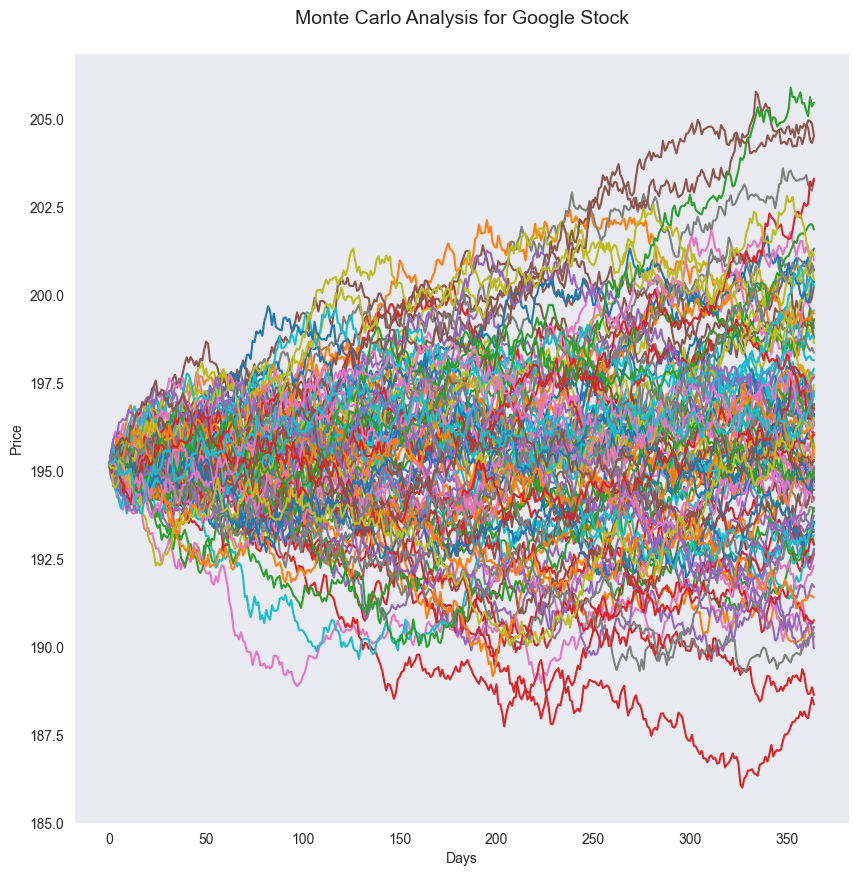

In [870]:
# Get start price(stock open price) from GOOG.head()
start_price = all_close['GOOG'].sort_index(ascending=False).iloc[0]

for run in range(100):
    plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google Stock\n', fontsize = 14)
plt.show()

In [871]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo_simulation(start_price, days, mu, sigma)[days-1]

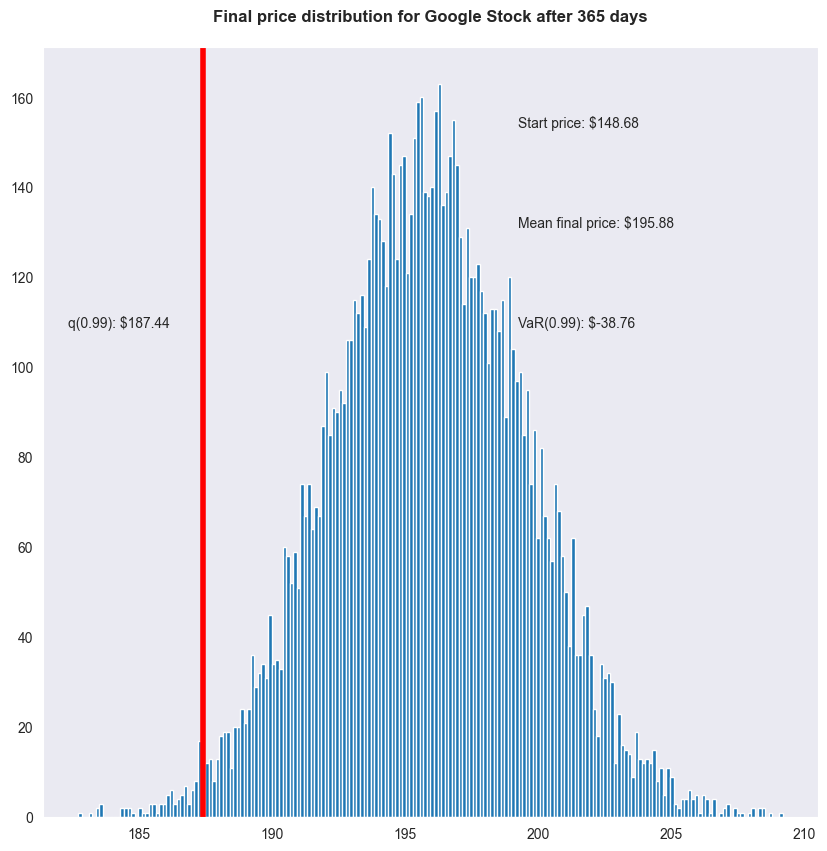

In [872]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Use plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days\n" % days, weight='bold');

In [ ]:
of the end results for a much larger run.

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo_simulation(start_price, days, mu, sigma)[days-1]
Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to defi